In [3]:
import tensorflow as tf
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn.model_selection 
from PIL import Image
import numpy as np

In [1]:
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
os.chdir(r"D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped")

In [5]:
Data = []
Labels = []
classes = 43
data_path = os.getcwd()

In [119]:
data_path

'D:\\Computer education\\DL & ML\\Traffic sign recognition\\Dataset\\unzipped'

In [45]:
for i in range(classes):
    path = os.path.join(data_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((30,30))
            image = np.array(image)
            Data.append(image)
            Labels.append(i)
        except Exception as e:
            print(e)

In [46]:
Data = np.array(Data)
Labels = np.array(Labels)

In [47]:
np.save(r'D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped\Training_Data',Data)
np.save(r'D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped\Training_Labels',Labels)

In [121]:
Data = np.load(r'D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped\Training_Data.npy')
Labels = np.load(r'D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped\Training_Labels.npy')

In [49]:
print(Data.shape, Labels.shape)

(39209, 30, 30, 3) (39209,)


In [50]:
Data[0]

array([[[ 75,  78,  80],
        [ 74,  76,  78],
        [ 85,  86,  84],
        ...,
        [ 68,  75,  74],
        [ 65,  69,  68],
        [ 66,  67,  66]],

       [[ 83,  84,  86],
        [ 80,  80,  82],
        [ 88,  88,  83],
        ...,
        [ 73,  77,  78],
        [ 76,  78,  75],
        [ 80,  80,  78]],

       [[ 78,  78,  80],
        [ 86,  85,  86],
        [ 90,  89,  90],
        ...,
        [ 71,  74,  71],
        [ 73,  74,  69],
        [ 78,  78,  74]],

       ...,

       [[133, 134, 139],
        [123, 127, 132],
        [112, 121, 125],
        ...,
        [ 94,  95,  89],
        [ 97,  98,  91],
        [ 99, 103,  99]],

       [[ 91,  95,  99],
        [ 91,  98, 103],
        [ 75,  86,  90],
        ...,
        [104, 102,  96],
        [110, 113, 104],
        [ 96, 104,  98]],

       [[ 85,  84,  87],
        [ 95, 101, 107],
        [ 63,  76,  81],
        ...,
        [103, 103,  95],
        [ 99, 102,  90],
        [ 90,  97,  89]]

In [61]:
xtrain,xtest,ytrain,ytest = sklearn.model_selection.train_test_split(Data,Labels,test_size=0.2)

In [58]:
xtrain.shape

(31367, 30, 30, 3)

In [68]:
ytrain = to_categorical(ytrain, 43)
ytest = to_categorical(ytest, 43)

In [69]:
cnn = Sequential()
cnn.add(Conv2D(filters=30, kernel_size=(4,4),activation='relu',input_shape=((30,30,3))))
cnn.add(Conv2D(filters=30, kernel_size=(4,4),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3,3)))
cnn.add(Dropout(rate=0.2))
cnn.add(Conv2D(filters=50, kernel_size=(3,3),activation='relu'))
cnn.add(Conv2D(filters=50, kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3,3)))
cnn.add(Dropout(rate=0.2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(rate=0.5))
cnn.add(Dense(43, activation='softmax'))

In [70]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
history = cnn.fit(xtrain, ytrain, batch_size=32, epochs=20, validation_data=(xtest, ytest))

Epoch 1/20
981/981 [==============================] - 87s 89ms/step - loss: 2.1834 - accuracy: 0.3960 - val_loss: 0.8087 - val_accuracy: 0.7621
Epoch 2/20
981/981 [==============================] - 83s 84ms/step - loss: 0.7898 - accuracy: 0.7670 - val_loss: 0.2933 - val_accuracy: 0.9282
Epoch 3/20
981/981 [==============================] - 76s 78ms/step - loss: 0.4926 - accuracy: 0.8620 - val_loss: 0.1537 - val_accuracy: 0.9602
Epoch 4/20
981/981 [==============================] - 77s 79ms/step - loss: 0.3785 - accuracy: 0.8972 - val_loss: 0.1166 - val_accuracy: 0.9716
Epoch 5/20
981/981 [==============================] - 76s 78ms/step - loss: 0.3350 - accuracy: 0.9106 - val_loss: 0.0855 - val_accuracy: 0.9801
Epoch 6/20
981/981 [==============================] - 76s 78ms/step - loss: 0.2843 - accuracy: 0.9260 - val_loss: 0.0771 - val_accuracy: 0.9814
Epoch 7/20
981/981 [==============================] - 77s 79ms/step - loss: 0.2688 - accuracy: 0.9311 - val_loss: 0.0823 - val_accuracy:

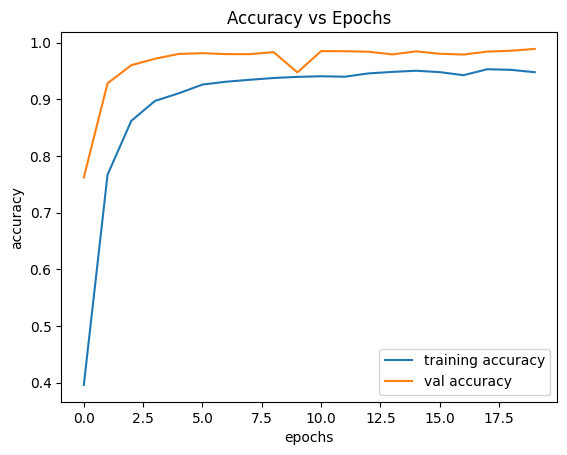

In [91]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

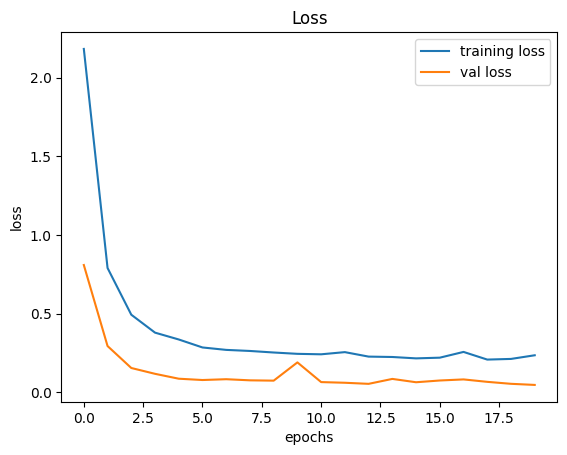

In [92]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [112]:
cnn.save(r'D:\Computer education\DL & ML\Traffic sign recognition\Traffic_sign_detection_v0.h5')

""""
cnn.save(r'D:\Computer education\DL & ML\Traffic sign recognition\Traffic_sign_detection_v0')
**this can also be used to save the model**

"""

INFO:tensorflow:Assets written to: D:\Computer education\DL & ML\Traffic sign recognition\Traffic_sign_detection_v0\assets


INFO:tensorflow:Assets written to: D:\Computer education\DL & ML\Traffic sign recognition\Traffic_sign_detection_v0\assets


In [6]:
model = load_model(r'D:\Computer education\DL & ML\Traffic sign recognition\Traffic_sign_detection_v0.h5')

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 27, 27, 30)        1470      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 30)        14430     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 30)          0         
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 50)          13550     
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 50)          22550     
                                                      

In [18]:
Test_Data=[]
Test_Labels=[]

In [110]:
path = os.path.join(data_path,'Test')
images = os.listdir(path)
labels = pd.read_csv(r'D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped\Test.csv')

In [133]:
labels["ClassId"]

0        16
1         1
2        38
3        33
4        11
         ..
12625    12
12626    33
12627     6
12628     7
12629    10
Name: ClassId, Length: 12630, dtype: int64

In [135]:
print(labels["ClassId"].shape)
len(images)

(12630,)


12631

In [21]:
k=0
for i in images:
    try:
        path_ = os.path.join(path,images[k])
        image = Image.open(path_)
        image = image.resize((30,30))
        image = np.array(image)
        Test_Data.append(image)
        Test_Labels.append(labels["ClassId"][k])
    except Exception as e:
        print(e)
    k=k+1

In [63]:
Test_Data = np.array(Test_Data)
Test_Labels = np.array(Test_Labels)

In [64]:
print(Test_Data.shape)
print(Test_Labels.shape)

(12630, 30, 30, 3)
(12630,)


In [65]:
np.save(r'D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped\Testing_Data',Test_Data)
np.save(r'D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped\Testing_Labels',Test_Labels)

In [67]:
Test_Data = np.load(r'D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped\Testing_Data.npy')
Test_Labels = np.load(r'D:\Computer education\DL & ML\Traffic sign recognition\Dataset\unzipped\Testing_Labels.npy')

In [68]:
print(Test_Data.shape)
print(Test_Labels.shape)

(12630, 30, 30, 3)
(12630,)


In [15]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [83]:
predict = np.array(model.predict(Test_Data))

395/395 [==============================] - 4s 9ms/step


In [84]:
predict.shape

(12630, 43)

In [85]:
predictions=np.empty(len(predict))
for i in range(len(predictions)):
    predictions[i] = predict[i].argmax()

In [87]:
predictions.shape

(12630,)

In [88]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,Test_Labels))


""""   This gives the final accuracy or the testing accuracy of our model  """

0.9568487727632621


In [111]:
def Visualize_prediction():
    a = np.random.randint(0,len(predictions)-1)
    pred = predictions[a]
    actual = Test_Labels[a]
    title = 'Actual: '+classes[actual]+'  vs  Predicted: '+classes[pred]
    path_ = os.path.join(path,images[a])
    image = Image.open(path_)
    plt.imshow(image)
    plt.title(title)
    plt.show()

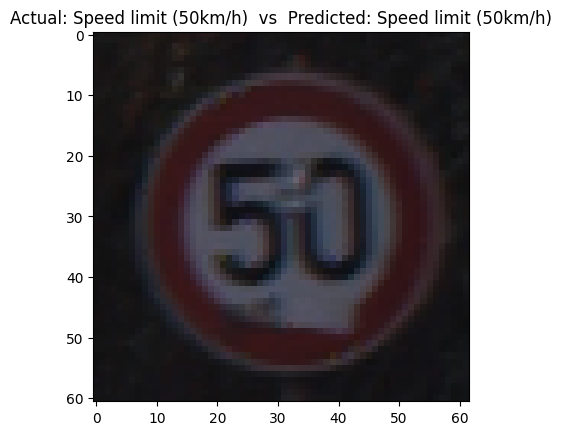

In [127]:
Visualize_prediction()